In [108]:
import numpy as np
import math
import random 
from utils import blackbox_inference, submit
from skimage.io import imread
from PIL import Image


class Perturbation():
    def __init__(self):
        mu,sigma = 128,127
        self.x = math.floor(np.random.uniform(1,139,1))
        self.y = math.floor(np.random.uniform(1,139,1))
        self.r = math.floor(np.random.normal(mu,sigma,1))
        self.g = math.floor(np.random.normal(mu,sigma,1))
        self.b = math.floor(np.random.normal(mu,sigma,1))
        
    def newValues(self, x,y,r,g,b):
        self.x = x
        self.y = y
        self.r = r
        self.g = g
        self.b = b
        
    def giveValues(self):
        return self.x,self.y,self.r,self.g,self.b
        
class CandidateSolution():
    def __init__(self,nb_perturbations):
        self.nb_perturb = nb_perturbations
        self.perturbs = []
        self.child = []
        self.F = 0.5
        for i in range(nb_perturbations):
            self.perturbs.append(Perturbation())
    
    # creates nb_perturbs mutated from the original CandidateSolution's perts. 
    # returns them in an array
    def giveBirth(self):
        
        new_perts = []
        for i in range(self.nb_perturb):

            # get the perturbations this element will evolve from 
            i1,i2,i3 = self.getRandoms()
            
            # get values of the pixel form 1st perturb
            x1 = self.perturbs[i1].x
            y1 = self.perturbs[i1].y
            r1 = self.perturbs[i1].r
            g1 = self.perturbs[i1].g
            b1 = self.perturbs[i1].b
            #print(x1)
            
            # get values of the pixel form 2nd perturb
            x2 = self.perturbs[i2].x
            y2 = self.perturbs[i2].y
            r2 = self.perturbs[i2].r
            g2 = self.perturbs[i2].g
            b2 = self.perturbs[i2].b 
            #print(x2)

            # get values of the pixel form 3rd perturb
            x3 = self.perturbs[i3].x
            y3 = self.perturbs[i3].y
            r3 = self.perturbs[i3].r
            g3 = self.perturbs[i3].g
            b3 = self.perturbs[i3].b           
            #print(x3)

            # modify all values by the mutation rule 
            x_f = self.borned(0,138, x1 + self.F*(x2-x3))
            y_f = self.borned(0,138, y1 + self.F*(y2-y3))
            r_f = self.borned(0,255, r1 + self.F*(r2-r3))
            g_f = self.borned(0,255,g1 + self.F*(g2-g3))
            b_f = self.borned(0,255,b1 + self.F*(b2-b3))
            #print(x_f)

            # create new pert with mutated values
            pert =  Perturbation()
            pert.newValues(x_f,y_f,r_f,g_f,b_f)
                        
            # add pert to the new perts
            new_perts.append(pert)
            
            self.child = new_perts
        return new_perts
    
    def getRandoms(self):
        return random.sample(range(0, self.nb_perturb), 3)
    
    def borned(self, min, max, val):
        if val > max:
            val = max
        if val < min:
            val = min
        return val




In [152]:

im = imread("Images/blackbox/9.ppm")

# create population 
popu = []
for i in range(1):
    popu.append(CandidateSolution(1000))

# make the population search (1 itérations)
for i in range(70):
    for parent in popu:
        
        child = parent.giveBirth() #each parent creates a child
        im_child  = im
        im_parent = im

        # lets evaluate the perf of both the parent and the child on the image 
        for perturb in child:

            x,y,r,g,b = perturb.giveValues()
            
            # x,y,r,g,b values sometimes out of bounds
            im_child[int(x)][int(y)][0] = r
            im_child[int(x)][int(y)][1] = g
            im_child[int(x)][int(y)][2] = b
            
        for perturb in parent.perturbs:

            x,y,r,g,b = perturb.giveValues()

            # x,y,r,g,b values sometimes out of bounds
            im_parent[int(x)][int(y)][0] = r
            im_parent[int(x)][int(y)][1] = g
            im_parent[int(x)][int(y)][2] = b
            
        #predictions of the model 
        token = "8ZYRkMBfW1"
        probabilities_child  = blackbox_inference(token, im_child, label_only=False)
        probabilities_parent = blackbox_inference(token, im_parent, label_only=False)
        
        print("classes predicted")
        class_id_child = np.argmax(probabilities_child)
        print(class_id_child)
        class_id_parent = np.argmax(probabilities_parent)
        print(class_id_parent) 
        print("probabilities for the classes predicted")
        proba_child =  probabilities_child[class_id_child]
        print(probabilities_child[class_id_child])
        proba_parent = probabilities_parent[class_id_parent]
        print(probabilities_parent[class_id_parent])
    
        # kids is doing better
        if probabilities_child[0]>probabilities_parent[0]:
            parent.perturbs = parent.child

classes predicted
27
27
probabilities for the classes predicted
0.999996542930603
0.999996542930603
classes predicted
27
27
probabilities for the classes predicted
0.9999978542327881
0.9999978542327881
classes predicted
27
27
probabilities for the classes predicted
0.9999974966049194
0.9999974966049194
classes predicted
27
27
probabilities for the classes predicted
0.9999977350234985
0.9999977350234985
classes predicted
27
27
probabilities for the classes predicted
0.9999967813491821
0.9999967813491821
classes predicted
27
27
probabilities for the classes predicted
0.9999932050704956
0.9999932050704956
classes predicted
27
27
probabilities for the classes predicted
0.9999958276748657
0.9999958276748657
classes predicted
27
27
probabilities for the classes predicted
0.9999922513961792
0.9999922513961792
classes predicted
27
27
probabilities for the classes predicted
0.9999879598617554
0.9999879598617554
classes predicted
27
27
probabilities for the classes predicted
0.9999915361404419
0

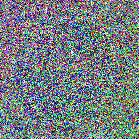

In [153]:

im_pil = Image.fromarray(im_parent)
im_pil


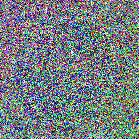

In [154]:

im_pil2 = Image.fromarray(im_child)
im_pil2

In [155]:
im_pil2.save("8.ppm")